<a href="https://colab.research.google.com/github/nandanksingh/AIML_Projects/blob/main/Image_captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [2]:
# Image preprocess

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
images_path = '../content/drive/MyDrive/Flickr8k/Flickr8k/images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [5]:
images[:5]

['../content/drive/MyDrive/Flickr8k/Flickr8k/images/377872472_35805fc143.jpg',
 '../content/drive/MyDrive/Flickr8k/Flickr8k/images/380590140_25b9889772.jpg',
 '../content/drive/MyDrive/Flickr8k/Flickr8k/images/381976882_0063d16d88.jpg',
 '../content/drive/MyDrive/Flickr8k/Flickr8k/images/3765374230_cb1bbee0cb.jpg',
 '../content/drive/MyDrive/Flickr8k/Flickr8k/images/380041023_0dfd712ef1.jpg']

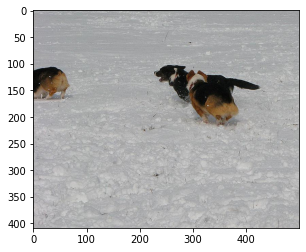

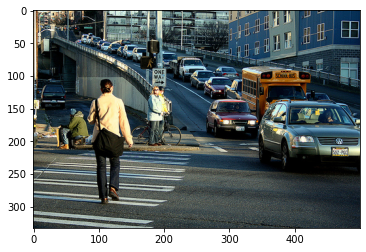

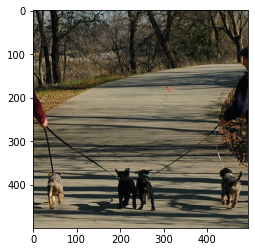

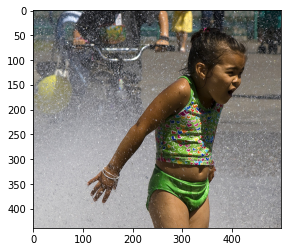

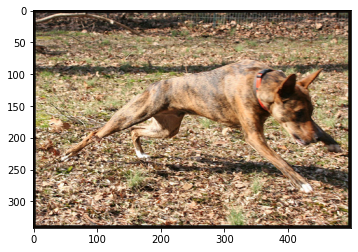

In [6]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [10]:
from tensorflow.keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102981632/102967424 [==============================] - 2s 0us/step


In [11]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1

    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [13]:
len(images_features)

1500

In [14]:
## Text Preprocess

In [15]:
caption_path = '../content/drive/MyDrive/Flickr8k/Flickr8k/captions.txt'

In [16]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [17]:
len(captions)

40461

In [18]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [19]:
len(captions_dict)

1500

In [20]:
## Visualize Images with captions

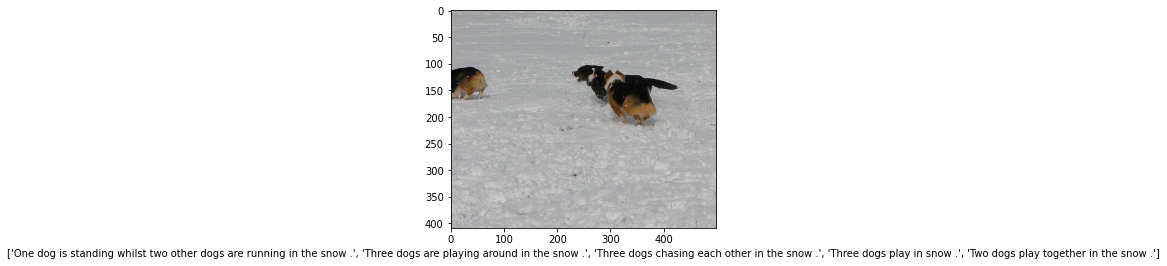

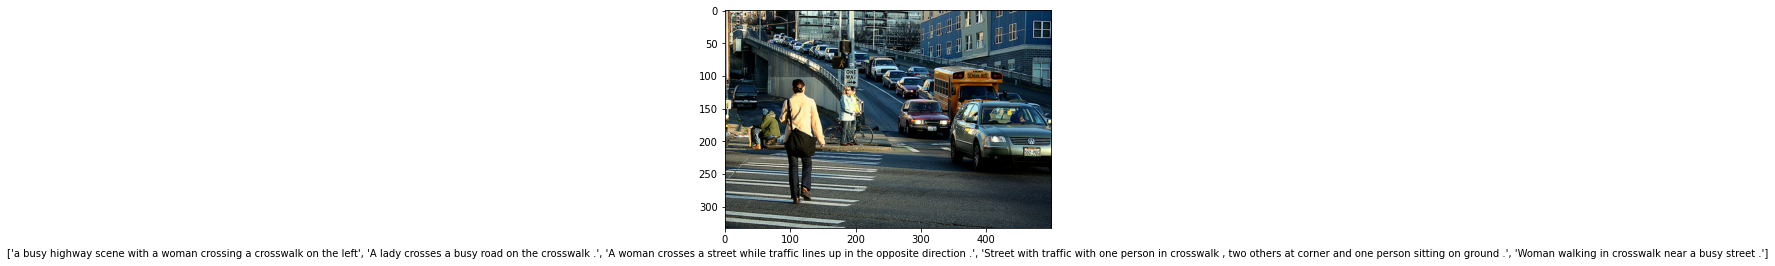

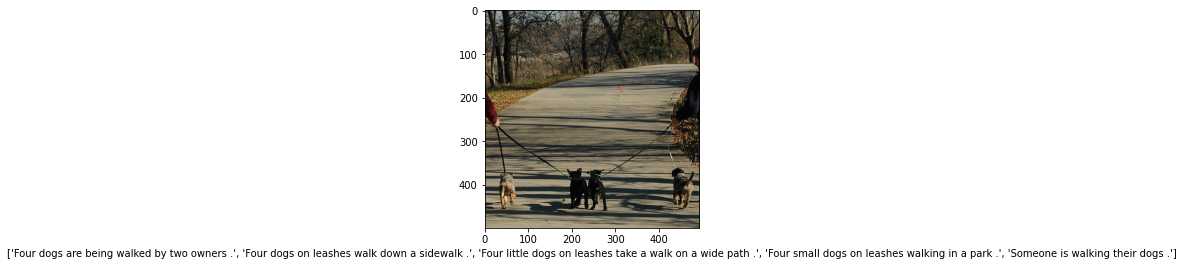

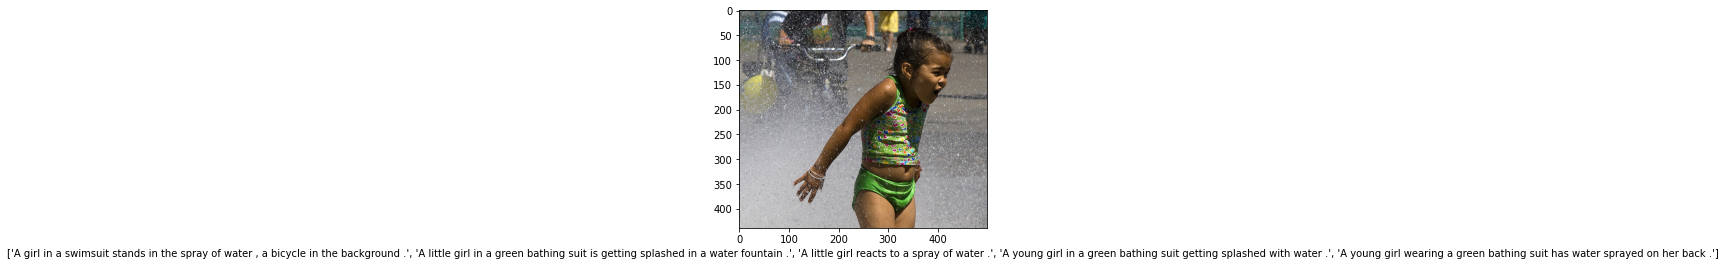

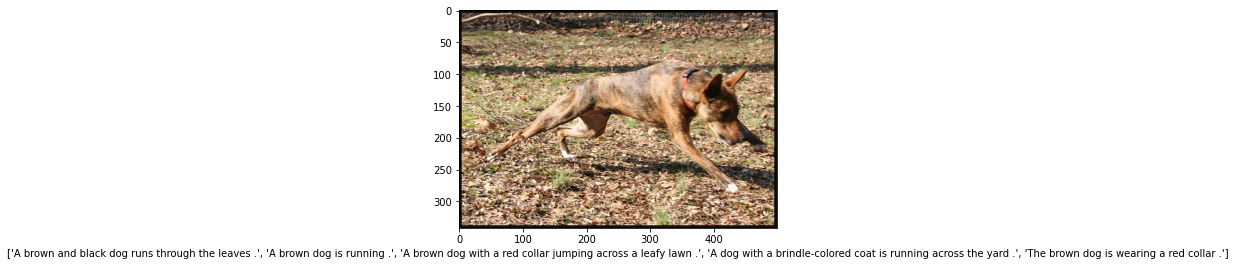

In [21]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

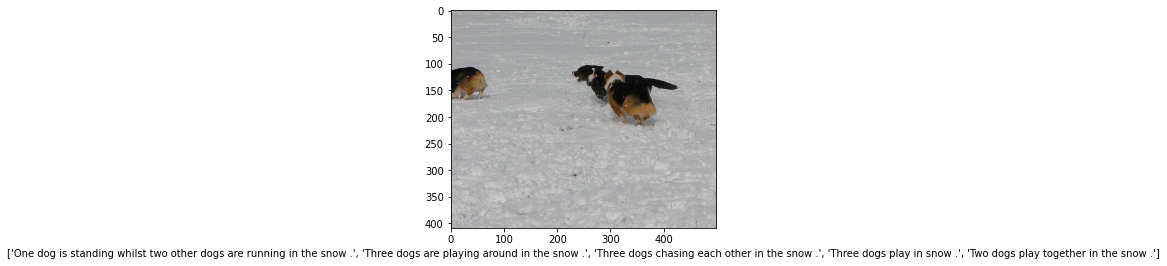

In [22]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '../content/drive/MyDrive/Flickr8k/Flickr8k/images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [23]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [24]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [25]:
## Create Vocabulary

In [26]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [27]:
len(count_words)

3980

In [28]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [29]:
len(new_dict)

3980

In [30]:
new_dict['<OUT>'] = len(new_dict) 

In [31]:
captions_backup = captions_dict.copy()

In [32]:
captions_dict = captions_backup.copy()

In [33]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [34]:
captions_dict

{'3527184455_1a9c074ff2.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   2,
   13,
   14,
   15,
   16,
   17,
   2,
   18,
   19,
   20],
  [1,
   2,
   3,
   15,
   5,
   15,
   4,
   7,
   8,
   9,
   10,
   11,
   12,
   2,
   14,
   21,
   22,
   23,
   24,
   25,
   19,
   20],
  [1, 26, 27, 2, 3, 15, 5, 4, 7, 9, 11, 12, 2, 14, 19, 20],
  [1, 7, 28, 4, 7, 29, 30, 12, 2, 13, 14, 19, 20],
  [1, 7, 28, 4, 7, 29, 31, 12, 2, 13, 14, 19, 20]],
 '3527261343_efa07ea596.jpg': [[1,
   2,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   2,
   40,
   12,
   41,
   42,
   19,
   20],
  [1, 2, 3, 27, 39, 2, 40, 12, 2, 43, 38, 44, 41, 45, 46, 19, 20],
  [1, 2, 3, 21, 2, 47, 15, 48, 15, 4, 49, 50, 12, 27, 51, 12, 2, 43, 19, 20],
  [1, 3, 52, 45, 53, 23, 54, 38, 51, 42, 19, 20],
  [1, 55, 51, 2, 42, 39, 2, 38, 20]],
 '3527524436_a54aca78a9.jpg': [[1,
   2,
   3,
   23,
   2,
   56,
   57,
   23,
   2,
   58,
   59,
   60,
   61,
   19,
   20],
  [

In [35]:
## Build Generator Function

In [36]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [37]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 10, 11, 12, 2, 13, 14, 15, 16, 17, 2, 18, 19, 20]
[1, 106, 67, 31, 23, 105, 93, 2, 3, 114, 27, 104, 23, 105, 93, 2, 115, 116, 21, 117, 118, 12, 119, 19, 20]
[1, 2, 233, 234, 81, 135, 235, 236, 12, 41, 43, 199, 125, 214, 81, 114, 27, 104, 157, 41, 42, 12, 2, 237, 238, 19, 20]
[1, 2, 3, 21, 317, 12, 41, 79, 27, 322, 138, 24, 5, 21, 2, 49, 321, 4, 47, 323, 199, 125, 200, 324, 104, 23, 105, 93, 2, 47, 325, 318, 19, 20]


In [38]:
MAX_LEN

34

In [39]:
captions_dict

{'3527184455_1a9c074ff2.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   2,
   13,
   14,
   15,
   16,
   17,
   2,
   18,
   19,
   20],
  [1,
   2,
   3,
   15,
   5,
   15,
   4,
   7,
   8,
   9,
   10,
   11,
   12,
   2,
   14,
   21,
   22,
   23,
   24,
   25,
   19,
   20],
  [1, 26, 27, 2, 3, 15, 5, 4, 7, 9, 11, 12, 2, 14, 19, 20],
  [1, 7, 28, 4, 7, 29, 30, 12, 2, 13, 14, 19, 20],
  [1, 7, 28, 4, 7, 29, 31, 12, 2, 13, 14, 19, 20]],
 '3527261343_efa07ea596.jpg': [[1,
   2,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   2,
   40,
   12,
   41,
   42,
   19,
   20],
  [1, 2, 3, 27, 39, 2, 40, 12, 2, 43, 38, 44, 41, 45, 46, 19, 20],
  [1, 2, 3, 21, 2, 47, 15, 48, 15, 4, 49, 50, 12, 27, 51, 12, 2, 43, 19, 20],
  [1, 3, 52, 45, 53, 23, 54, 38, 51, 42, 19, 20],
  [1, 55, 51, 2, 42, 39, 2, 38, 20]],
 '3527524436_a54aca78a9.jpg': [[1,
   2,
   3,
   23,
   2,
   56,
   57,
   23,
   2,
   58,
   59,
   60,
   61,
   19,
   20],
  [

In [40]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]
                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    

In [41]:
X, y_in, y_out = generator(images_features, captions_dict)

In [42]:
len(X), len(y_in), len(y_out)

(96724, 96724, 96724)

In [43]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [44]:
X.shape, y_in.shape, y_out.shape

((96724, 2048), (96724, 34), (96724, 3981))

In [45]:
X[1510]

array([0.00687524, 0.        , 0.63232946, ..., 3.5371835 , 0.19290294,
       0.6768984 ], dtype=float32)

In [46]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
## MODEL

In [48]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [49]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))
language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 34, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 128)           509568    
                                                                 
 lstm (LSTM)                 (None, 34, 256)           394240    
                            

In [50]:
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

Epoch 1/100
189/189 [==============================] - 42s 174ms/step - loss: 5.0648 - accuracy: 0.1722
Epoch 2/100
189/189 [==============================] - 33s 174ms/step - loss: 4.5287 - accuracy: 0.2442
Epoch 3/100
189/189 [==============================] - 33s 174ms/step - loss: 4.3568 - accuracy: 0.2583
Epoch 4/100
189/189 [==============================] - 33s 174ms/step - loss: 4.2505 - accuracy: 0.2668
Epoch 5/100
189/189 [==============================] - 33s 174ms/step - loss: 4.1567 - accuracy: 0.2782
Epoch 6/100
189/189 [==============================] - 33s 173ms/step - loss: 3.9517 - accuracy: 0.2963
Epoch 7/100
189/189 [==============================] - 33s 174ms/step - loss: 3.7645 - accuracy: 0.3146
Epoch 8/100
189/189 [==============================] - 33s 174ms/step - loss: 3.6246 - accuracy: 0.3287
Epoch 9/100
189/189 [==============================] - 33s 174ms/step - loss: 3.4978 - accuracy: 0.3419
Epoch 10/100
189/189 [==============================] - 33s 174m

In [59]:
inv_dict = {v:k for k, v in new_dict.items()}

In [60]:
model.save('model.h5')

In [61]:
model.save_weights('singh_model_weights.h5')

In [54]:
np.save('vocab.npy', new_dict)

In [55]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [56]:
## Predictions

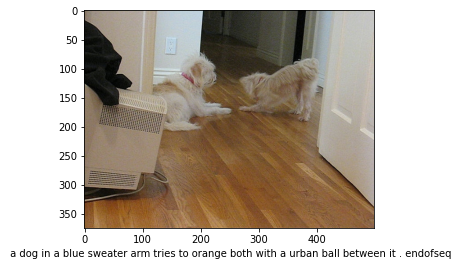

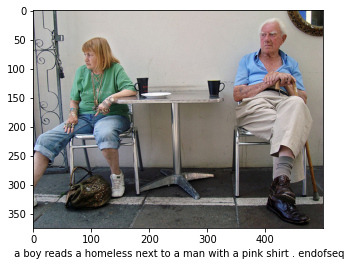

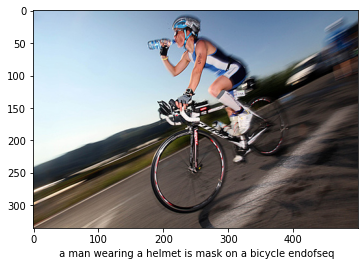

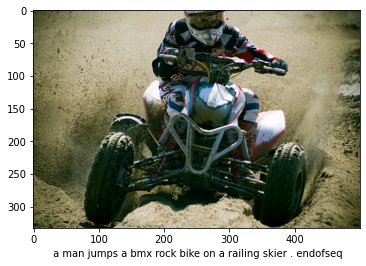

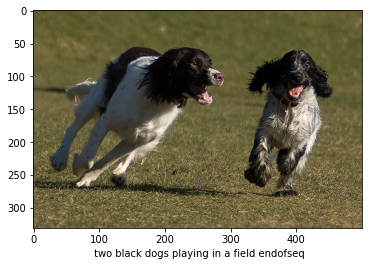

In [57]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)